In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

mnist = fetch_openml("mnist_784",version=1, as_frame=False)


In [14]:
X , y = mnist["data"], mnist["target"].astype("int")
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [15]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=10000, random_state=42, stratify=y)
print(X_test.shape)
print(X_train.shape)

(10000, 784)
(60000, 784)


In [17]:
sgd_clf = sgd(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [18]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
print(sgd_clf.score(X_test,y_test))
print(rf_clf.score(X_test,y_test))
sgd_predicted = sgd_clf.predict(X_test)
rf_predicted = rf_clf.predict(X_test)

0.8856
0.9683


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,sgd_predicted))
print(confusion_matrix(y_test,sgd_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.95      0.96      1020
           4       0.97      0.96      0.97       975
           5       0.97      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.97      0.97      0.97      1042
           8       0.96      0.95      0.96       975
           9       0.94      0.95      0.94       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 976    1    1    0    1    0    4    0    3    0]
 [   0 1109    4    3    1    3    2    2    1    0]
 [   5    1  971    4    4    1    2    6    4    1]
 [   1    0   12  973    0   10    1   11   10    2]
 [   1    0    2    0  940   

In [21]:
print((y_test!=sgd_predicted).sum())
print((y_test!=rf_predicted).sum())

317


In [1]:
print("rf model")
print("確認したい数字2つを入力してください。")
check = int(input())
result= int(input())
misclassified = (y_test == check) & (rf_predicted == result)
    
imgs = X_test[misclassified][:10]
    
for index, img in enumerate(imgs):
    plt.subplot(1, 10, index+1)
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(img.reshape(28, 28), cmap="Greys",interpolation="nearest")


plt.title(f"{check} but {result}")
plt.suptitle("rf model")
plt.show()

rf model
確認したい数字2つを入力してください。


NameError: name 'y_test' is not defined

確認したい数字2つを入力してください。


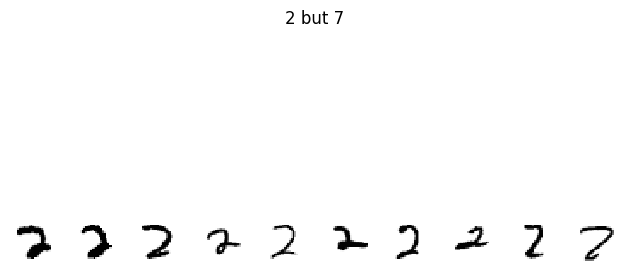

In [24]:

print("確認したい数字2つを入力してください。")
check = int(input())
result= int(input())
misclassified = (y_test == check) & (sgd_predicted == result)
    
imgs = X_test[misclassified][:10]
    
for index, img in enumerate(imgs):
    plt.subplot(1, 10, index+1)
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(img.reshape(28, 28), cmap="Greys",interpolation="nearest")

plt.suptitle(f"{check} but {result}")
plt.show()